# ASSIGNMENT 5

Harsh Kumar

21BDS0391

harsh.kumar2021@vitstudent.ac.in



```
Assignment 5:
    Take all the columns in mall_customers.csv
    gender age annual income spending score
    perform label encoding on gender
    train your data
    
```



# 1. import necessary libraries.

In [95]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 2. import dataset.

In [96]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


# 4. Label Encoding

In [98]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [99]:
df["Genre"] = le.fit_transform(df["Genre"])

# 3. Select the feature to cluster.

In [100]:
# Selecting annual income and spending as features for clustering.

X = df.iloc[:, 1:].values
X

array([[  1,  19,  15,  39],
       [  1,  21,  15,  81],
       [  0,  20,  16,   6],
       [  0,  23,  16,  77],
       [  0,  31,  17,  40],
       [  0,  22,  17,  76],
       [  0,  35,  18,   6],
       [  0,  23,  18,  94],
       [  1,  64,  19,   3],
       [  0,  30,  19,  72],
       [  1,  67,  19,  14],
       [  0,  35,  19,  99],
       [  0,  58,  20,  15],
       [  0,  24,  20,  77],
       [  1,  37,  20,  13],
       [  1,  22,  20,  79],
       [  0,  35,  21,  35],
       [  1,  20,  21,  66],
       [  1,  52,  23,  29],
       [  0,  35,  23,  98],
       [  1,  35,  24,  35],
       [  1,  25,  24,  73],
       [  0,  46,  25,   5],
       [  1,  31,  25,  73],
       [  0,  54,  28,  14],
       [  1,  29,  28,  82],
       [  0,  45,  28,  32],
       [  1,  35,  28,  61],
       [  0,  40,  29,  31],
       [  0,  23,  29,  87],
       [  1,  60,  30,   4],
       [  0,  21,  30,  73],
       [  1,  53,  33,   4],
       [  1,  18,  33,  92],
       [  0,  

In [101]:
type(X)

numpy.ndarray

# 5. Find the optimal number of clusters -- elbow method.

In [102]:
from sklearn.cluster import KMeans

# Trying different values of k and calculating WCSS for each value of k
wcss = []
for k in range(1,16):
  kmeans = KMeans(n_clusters = k, init="k-means++", random_state=0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_) #savind wcss value in a list

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [103]:
wcss

[308862.06000000006,
 212889.44245524303,
 143391.59236035676,
 104414.67534220168,
 75399.61541401484,
 58348.641363315044,
 51132.703212576904,
 44392.11566567935,
 41000.8742213207,
 37649.69225429742,
 34665.087277598795,
 31659.187454375693,
 29388.61288883975,
 28170.631036266237,
 26470.47953378321]

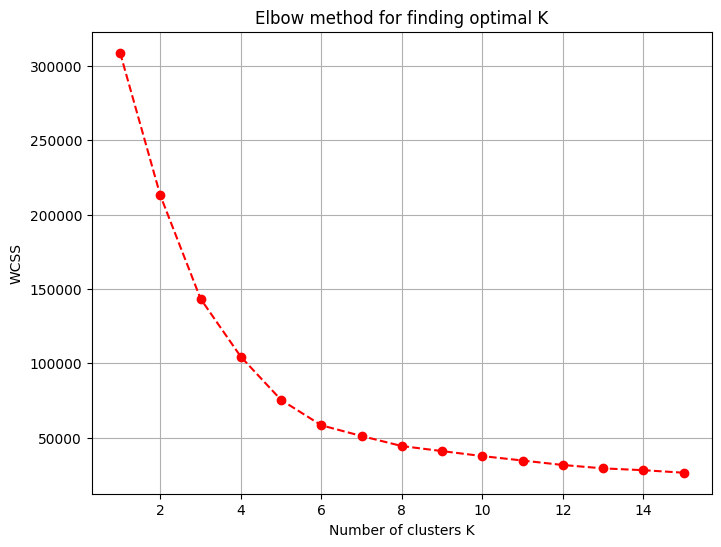

In [104]:
# PLOTTING ELBOW METHOD GRAPH

plt.figure(figsize = (8,6))
plt.plot(range(1,16), wcss, "o--", color="red")
plt.title("Elbow method for finding optimal K")
plt.xlabel("Number of clusters K")
plt.ylabel("WCSS")
plt.grid()
plt.show()

In [105]:
# Taking K=6 instead of becausa WCSS value is low

# 6. Train the model on dataset using optimal cluster value k=6.

In [106]:
kmeans = KMeans(n_clusters = 6, init="k-means++", random_state=0) #"k-means++" means initializing the random clusters
#return a label for data based on their cluster.
Y_kmeans = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [107]:
Y_kmeans

array([5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4,
       5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 1, 4, 1, 0,
       5, 4, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 3, 0, 3, 2, 3, 2, 3, 2, 3,
       0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3], dtype=int32)

In [108]:
# Age that belongs to cluster 0
X[Y_kmeans == 0,1]

array([31, 27, 29, 31, 33, 31, 27, 19, 18, 19, 32, 26, 40, 23, 38, 21, 22,
       34, 18, 40, 32, 24, 27, 20, 23, 26, 21, 19, 38, 19, 18, 19, 27, 38,
       40, 23, 25, 28])

In [109]:
# Age that belongs to cluster 1
X[Y_kmeans == 1,1]

array([65, 48, 50, 49, 59, 50, 47, 51, 69, 53, 70, 67, 54, 63, 43, 68, 70,
       47, 60, 60, 59, 45, 49, 57, 67, 46, 48, 55, 50, 68, 48, 47, 48, 49,
       67, 49, 66, 54, 68, 66, 65, 63, 49, 51, 50])

In [110]:
# Age that belongs to cluster 2
X[Y_kmeans == 2,1]

array([43, 59, 47, 20, 44, 19, 57, 25, 48, 34, 43, 44, 47, 37, 34, 56, 19,
       50, 42, 36, 40, 36, 52, 58, 59, 37, 46, 41, 54, 41, 34, 33, 47, 45,
       32])

In [111]:
# Data points that belong to cluster 0
X[Y_kmeans == 0]

array([[ 0, 31, 39, 61],
       [ 0, 27, 40, 47],
       [ 0, 29, 40, 42],
       [ 0, 31, 40, 42],
       [ 1, 33, 42, 60],
       [ 0, 31, 43, 54],
       [ 0, 27, 46, 51],
       [ 1, 19, 46, 55],
       [ 1, 18, 48, 59],
       [ 1, 19, 48, 59],
       [ 0, 32, 48, 47],
       [ 1, 26, 54, 54],
       [ 1, 40, 54, 48],
       [ 0, 23, 54, 52],
       [ 1, 38, 54, 55],
       [ 0, 21, 54, 57],
       [ 0, 22, 57, 55],
       [ 0, 34, 58, 60],
       [ 1, 18, 59, 41],
       [ 0, 40, 60, 40],
       [ 0, 32, 60, 42],
       [ 1, 24, 60, 52],
       [ 0, 27, 60, 50],
       [ 1, 20, 61, 49],
       [ 0, 23, 62, 41],
       [ 1, 26, 62, 55],
       [ 0, 21, 62, 42],
       [ 0, 19, 63, 54],
       [ 0, 38, 64, 42],
       [ 1, 19, 64, 46],
       [ 0, 18, 65, 48],
       [ 0, 19, 65, 50],
       [ 1, 27, 67, 56],
       [ 0, 38, 67, 40],
       [ 0, 40, 69, 58],
       [ 0, 23, 70, 29],
       [ 0, 25, 72, 34],
       [ 0, 28, 76, 40]])